#CONNECT TO GOOGLE DRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#ACCESSING REQUIRED FILE TO DEFINE X_TRAIN

In [2]:
import os

os.chdir('/content/drive/MyDrive/Project_resized/SD_SC')

#CREATING train_x and train_y

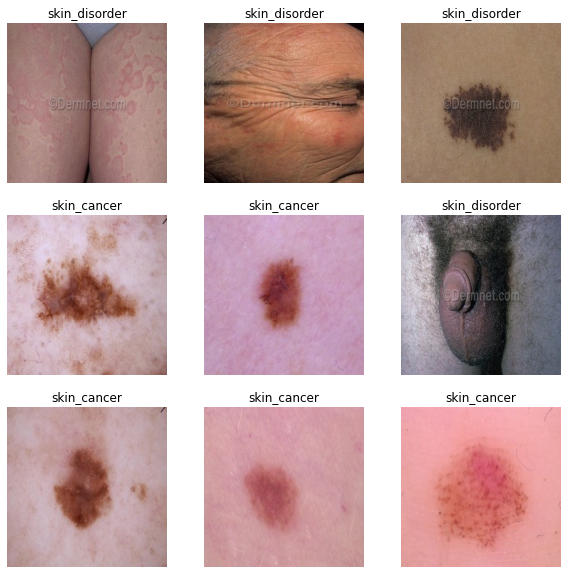

In [3]:
from re import I
import cv2
import glob
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib as plt
import random


image_array = [] 
files = glob.glob ("*.jpg")
for myFile in files:
    image = cv2.imread (myFile, cv2.COLOR_BGR2RGB)
    image_array.append (cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
# // this will print the channel number, size, and number of images in the file

train_x = np.array(image_array)

fig = plt.pyplot.figure(figsize=(10, 10))
for i,rand in enumerate(random.sample(range(1,1300),9)):
    fig.add_subplot(3, 3, i+1)  
    plt.pyplot.imshow(train_x[rand,:,:,:])
    plt.pyplot.axis('off')
    plt.pyplot.title(files[rand].split("$")[0])

In [4]:
print(train_x.shape)

(1357, 224, 224, 3)


In [5]:
train_y = []
for i in range (0, len(files)):
  x = files[i].split("$")
  train_y.append(x[0])

print(train_y)

['skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorder', 'skin_disorde

#SPLITTING TEST DATASET FROM TRAIN DATASET

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(train_x,train_y,
                                   random_state=1, 
                                   test_size=0.20 
                                  )

In [7]:
from sklearn import preprocessing
yt = preprocessing.LabelEncoder()
yt.fit(Y_train)
print(list(yt.classes_))
test=yt.transform(Y_train)
Y_train=test
print(Y_train)

['skin_cancer', 'skin_disorder']
[0 1 1 ... 1 1 1]


In [8]:

test_2=yt.transform(Y_test)
Y_test=test_2
print(Y_test)

[0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1
 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1
 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0
 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1
 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0
 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 0 1 1]


#DEFINING THE MODEL 

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2 
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))


aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, BatchNormalization
from keras.models import Sequential

head = baseModel.output
head = tf.keras.layers.Conv2D(32, (3, 3), strides=2,activation='relu',padding = 'same')(head)
head = tf.keras.layers.MaxPooling2D(3, 3)(head)
head = tf.keras.layers.Conv2D(32, (3, 3),strides=2,padding = 'same', activation='relu')(head)
head = tf.keras.layers.Conv2D(64, (3, 3),strides=2,padding = 'same', activation='relu')(head)
head = tf.keras.layers.Flatten()(head)
head = tf.keras.layers.Dense(32, activation='relu')(head)
head = Dropout(0.4)(head)
head = tf.keras.layers.Dense(2, activation='softmax')(head)

model = Model(inputs=baseModel.input, outputs=head)


In [10]:
model.compile(optimizer = 'Adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

#EVALUATING THE MODEL

In [11]:
EPOCHS=6
H = model.fit(aug.flow(X_train, Y_train, batch_size = 64),epochs=EPOCHS, validation_data = (X_test, Y_test))

Epoch 1/6
17/17 [==============================] - 31s 901ms/step - loss: 0.1833 - accuracy: 0.9253 - val_loss: 7.9638 - val_accuracy: 0.4890
Epoch 2/6
17/17 [==============================] - 13s 761ms/step - loss: 0.0343 - accuracy: 0.9843 - val_loss: 12.9058 - val_accuracy: 0.6176
Epoch 3/6
17/17 [==============================] - 13s 761ms/step - loss: 0.0240 - accuracy: 0.9935 - val_loss: 8.4743 - val_accuracy: 0.7426
Epoch 4/6
17/17 [==============================] - 13s 756ms/step - loss: 0.0062 - accuracy: 0.9982 - val_loss: 16.5247 - val_accuracy: 0.5625
Epoch 5/6
17/17 [==============================] - 13s 760ms/step - loss: 0.0578 - accuracy: 0.9834 - val_loss: 2.0591 - val_accuracy: 0.8566
Epoch 6/6
17/17 [==============================] - 13s 765ms/step - loss: 0.0123 - accuracy: 0.9954 - val_loss: 1.5967 - val_accuracy: 0.8750


In [12]:
model.evaluate(X_test, Y_test , verbose=2)

9/9 - 0s - loss: 1.5967 - accuracy: 0.8750 - 330ms/epoch - 37ms/step


[1.5967026948928833, 0.875]

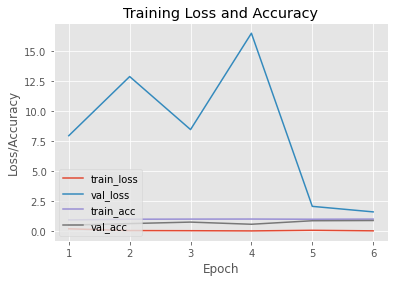

In [13]:
k = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(1, k+1), H.history["loss"], label="train_loss")
plt.plot(np.arange(1, k+1), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(1, k+1), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(1, k+1), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

#LOADING A RANDOM TEST IMAGE

In [14]:

# Import the necessary libraries
from PIL import Image
from numpy import asarray
 
 
# load the image and convert into
# numpy array
img = Image.open('/content/drive/MyDrive/Project/SKIN_CANCER/skin_cancer$ (100).jpg')
imResize = img.resize((224,224), Image.ANTIALIAS)
test = asarray(imResize)
 
# data

new = np.reshape(test, (1,224,224,3))
print(new.shape)

(1, 224, 224, 3)


#PREDICTING SKIN CANCER OR SKIN DISORDER

In [15]:
pred = model.predict(new)
print(pred)
if np.argmax(pred) == 0:
  print('Skin Cancer')
  
else:
  print('Skin Disorder')

1/1 [==============================] - 1s 1s/step
[[1.00000e+00 8.04025e-17]]
Skin Cancer


In [16]:
# Import the necessary libraries
from PIL import Image
from numpy import asarray
 
 
# load the image and convert into
# numpy array
img = Image.open('/content/drive/MyDrive/Project/SKIN_DISORDER/skin_disorder$ (10).jpg')
imResize = img.resize((224,224), Image.ANTIALIAS)
test = asarray(imResize)
 
# data

new = np.reshape(test, (1,224,224,3))
print(new.shape)

(1, 224, 224, 3)


In [17]:
pred = model.predict(new)
print(pred)
if np.argmax(pred) == 0:
  print('Skin Cancer')
  
else:
  print('Skin Disorder')

1/1 [==============================] - 0s 20ms/step
[[4.4268793e-09 1.0000000e+00]]
Skin Disorder


#SAVING THE MODEL

In [18]:
model.save('/content/sd_sc.h5')

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import h5py
import keras
sd_sc_model = keras.models.load_model('/content/sd_sc.h5',compile=False)

import tensorflow as tf 
tflite_model_file = "/content/sd_sc.tflite"

converter= tf.lite.TFLiteConverter.from_keras_model(sd_sc_model)
sd_sc = converter.convert()
with open(tflite_model_file, 'wb') as f:
  f.write(sd_sc)